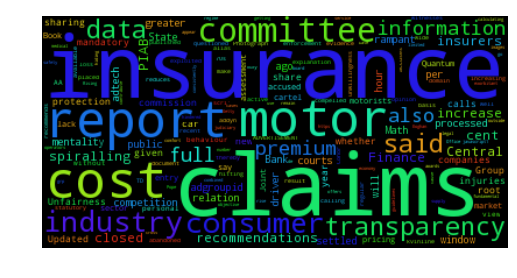

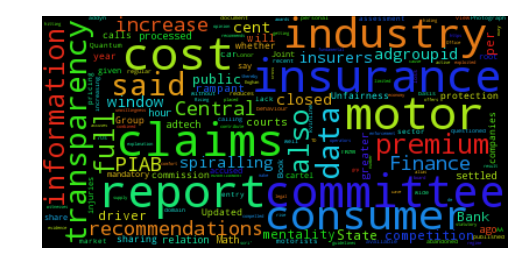

In [1]:
"""
MOOD.IE news site front page extractor
phase 1
"""
import os
import urllib.request
import re
from bs4 import BeautifulSoup
from bs4 import UnicodeDammit
from wordcloud import WordCloud

def cleanse_href(href_str, base_url):
    """
    Function to sort out the different href parsing methods
    and generate a meaningful URL's to follow
    """

    ret_val = True

    try:
        # getting rid of empties and white spaces
        href_str = href_str.strip()
    except AttributeError:
        ret_val = False


# getting rid of single digit , typically # hrefs
    if ret_val and len(href_str) > 1:
        ret_val = href_str
    else:
        ret_val = False

# converting to unicode
    if ret_val:
        href_str_unicode = UnicodeDammit(href_str)
        href_str = (href_str_unicode.unicode_markup)

# domain specific
    if ret_val and base_url == "http://www.irishtimes.com":
        # irish times puts a counter or a version number at the end
        # of their article pages, like 1.255698, so quick regexp
        # also, putting back the top domain to deliver full URL for irish times

        if re.search(r'\.[0-9]{3,5}', href_str):
            ret_val = TOP_DOMAIN + href_str
        else:
            ret_val = False

    return ret_val


os.system('cls')

TOP_DOMAIN = "http://www.irishtimes.com"

HTML_DOC = urllib.request.urlopen(TOP_DOMAIN)
SOUP = BeautifulSoup(HTML_DOC, 'lxml')

#get the URLs out, but only the ones which are pointing to a page under hte same domain
#def only_this_domain(href):
#   re.compile("^/*").search(href)
#soup.find_all(href=only_this_domain)

URL_LIST = []

for link in SOUP.find_all('a'):

    # and get them into a list, only one instance of each thou!

    href_content = link.get('href')
    href_content_clean = cleanse_href(href_content, TOP_DOMAIN)

    if href_content_clean is not False:
        #only append it once
        if href_content_clean not in URL_LIST:
            URL_LIST.append( href_content_clean)

# so, at this stage I have a full list of URL's which point to actual articles

# for i in range(0, len(URL_LIST)):
#    print("%d element: %s " % (i, URL_LIST[i]))

# right, get the first URL, and extract the words

CHILD_DOC = urllib.request.urlopen(URL_LIST[0])
CHILD_SOUP = BeautifulSoup(CHILD_DOC, 'lxml')

#this is irishtimes specific again..
ARTICLE = CHILD_SOUP.find('article')
#print (ARTICLE.getText())

# so, the wordcloud package takes a text file as input, let's create one
#TEXT_FILE = open('text.txt','w')
#TEXT_FILE.write(ARTICLE.getText())
# Read the whole text.

text = ARTICLE.getText()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
